# Support vector machine model 

This is this support vector machine model code and analysis created by Eleanor Barr

Support Vector Machine:

This is a non-probalisitc binary classifier
The model constructs a hyperplane in a high dimensional space, which can be used for classification or regression. 

In other words: given labeled training data the algorithm outputs an optimal hyperplane which catergorizes new examples. In two dimensional space this hyperplane is a line dividing a plane in two parts where each class lay either side of this line

In [1]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sn



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [4]:
dataset = pd.read_csv('framingham.csv')

In [5]:
dataset.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
import preprocessing_ml as pp

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


# Creating SVM function 

In [7]:
def support_vector(X_train, X_test, y_train, y_test, v=0):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    from sklearn.svm import SVC
    
    print('\nCalculating Support vector machine ..\n')
    SVM = SVC()
    SVM.fit(X_train, y_train) 
    
    
    
    if v == 1: 

        print('running support vector machine')
    
    return SVM
    
    

In [8]:
#apply all functions to model 

features = dataset.columns #try all columns

dataset_t = pp.chose_features(dataset, n_features=15) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

SVM = support_vector(X_train, X_test, y_train, y_test, v=1)
y_pred= SVM.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


running support vector machine
83.19672131147541


# Changing number of features 

In [9]:
acc=[]
acc2=[]
for i in range (3, 16 ):
    
    dataset_t = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    SVM = support_vector(X_train, X_test, y_train, y_test)
    y_pred= SVM.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)   
    
    acc.append(accuracy*100)
  


Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Number of features and the effect on accuracy ')

Text(0.5, 0, 'Number of features')

Text(0, 0.5, 'Accuracy %')

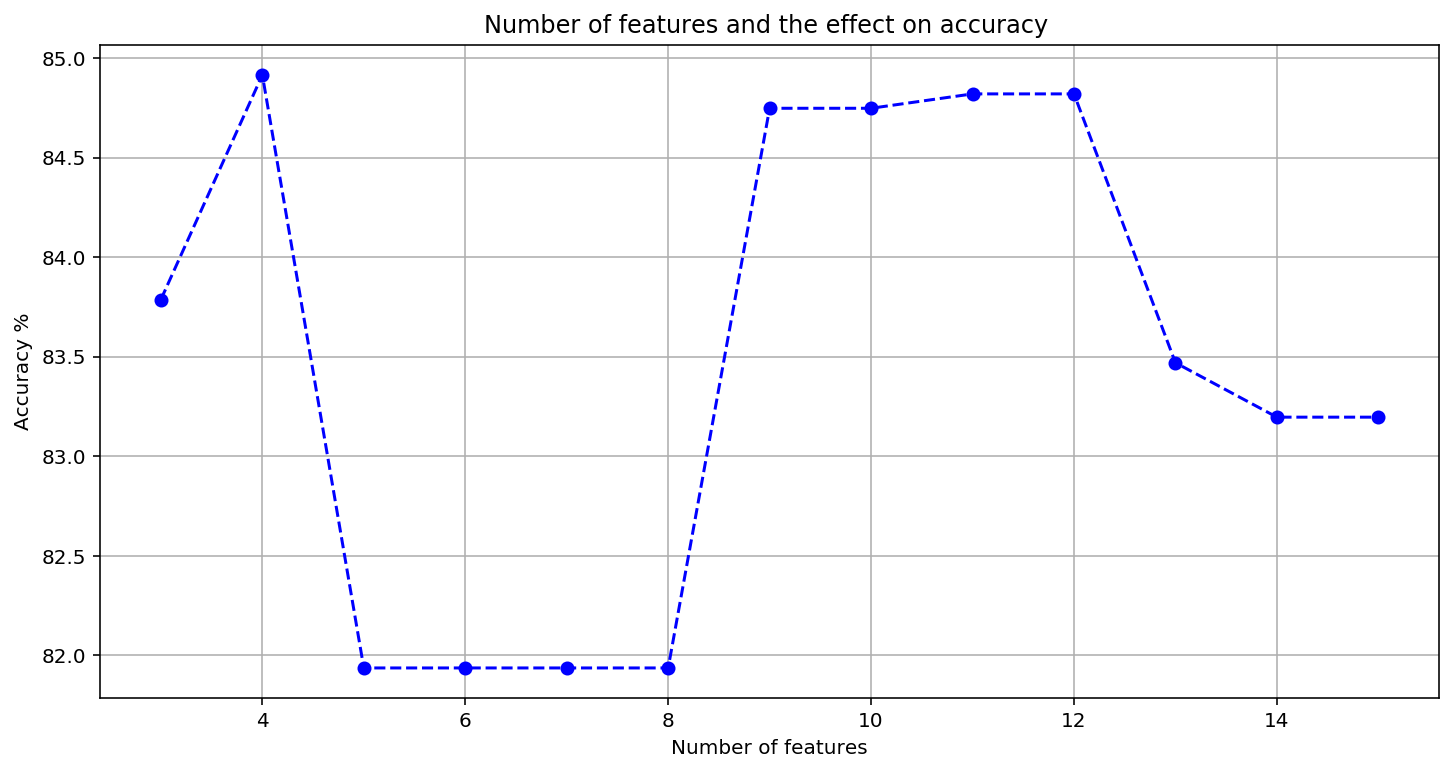

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(3,16), acc, 'bo', color='blue', linestyle='--')
plt.title('Number of features and the effect on accuracy ')
plt.xlabel('Number of features')
plt.ylabel('Accuracy %')
plt.grid()


# Scaling data - using 12 features

In [11]:
#apply all functions to model 


dataset_sc = pp.chose_features(dataset, n_features=12) # choose n features
dataset_sc = pp.drop_missing(dataset_sc) # drop missing rows
dataset_sc = pp.scale_data(dataset_sc, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_sc) # split dataset

SVM = support_vector(X_train, X_test, y_train, y_test)
y_pred= SVM.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

cm=confusion_matrix(y_test,y_pred)
conf_matrix_unsampled=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])



Scaling data....
	 * Using minmax scaling

Calculating Support vector machine ..

84.8202396804261


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
def support_vector(X_train, X_test, y_train, y_test, v=0,C=1.0, gamma='auto'):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    from sklearn.svm import SVC
    
    print('\nCalculating Support vector machine ..\n')
    SVM = SVC(C)
    SVM.fit(X_train, y_train) 
    

    if v == 1: 

        print('running support vector machine')
    
    return SVM

In [40]:
dataset_d = pp.chose_features(dataset, n_features=12) # choose n features
dataset_d = pp.drop_missing(dataset_d) # drop missing rows
dataset_d = pp.downsample(dataset_d)
dataset_d = pp.scale_data(dataset_d, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_d) # split dataset

SVM = support_vector(X_train, X_test, y_train, y_test, v=1, C=2, gamma='scale')
y_pred= SVM.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

cm=confusion_matrix(y_test,y_pred)
conf_matrix_downsampled =pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

Scaling data....
	 * Using minmax scaling

Calculating Support vector machine ..

running support vector machine
70.86956521739131


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
#changing values of C and seeing the effect on accuracy 
dataset_d = pp.chose_features(dataset, n_features=12) # choose n features
dataset_d = pp.drop_missing(dataset_d) # drop missing rows
dataset_d = pp.downsample(dataset_d)
dataset_d = pp.scale_data(dataset_d, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_d) # split dataset

acc=[]
for i in range(1,100):
    SVM = support_vector(X_train, X_test, y_train, y_test, v=1, C=i, gamma='scale')
    y_pred= SVM.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy*100)



Scaling data....
	 * Using minmax scaling

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine

Calculating Support vector machine ..

running support vector machine


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Value of C')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Alternating values of C and the effect on accuracy ')

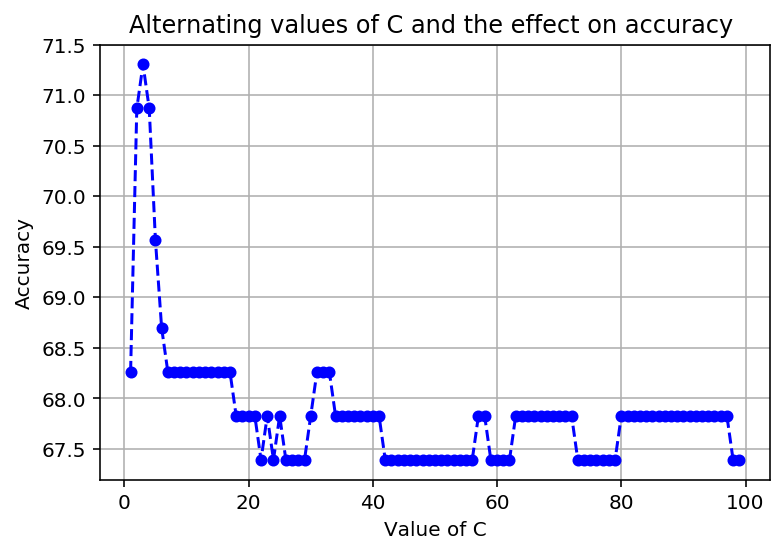

In [48]:
plt.figure()
plt.plot(range(1,100), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.grid()
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Alternating values of C and the effect on accuracy ')

In [49]:
#C is the best for accuracy

In [ ]:
dataset_d = pp.chose_features(dataset, n_features=12) # choose n features
dataset_d = pp.drop_missing(dataset_d) # drop missing rows
dataset_d = pp.downsample(dataset_d)
dataset_d = pp.scale_data(dataset_d, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_d) # split dataset

SVM = support_vector(X_train, X_test, y_train, y_test, v=1, C=2, gamma='scale')
y_pred= SVM.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

cm=confusion_matrix(y_test,y_pred)
conf_matrix_downsampled =pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

scaling data increases accuracy but same accuracy as k_neighbors 


# Up/downsampling data 

In [13]:
dataset_u = pp.chose_features(dataset, n_features=12) # choose n features
dataset_u = pp.drop_missing(dataset_u) # drop missing rows
dataset_u = pp.upsample(dataset_u)
dataset_u = pp.scale_data(dataset_u, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_u) # split dataset

SVM = support_vector(X_train, X_test, y_train, y_test)
y_pred= SVM.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

cm=confusion_matrix(y_test,y_pred)
conf_matrix_upsampled=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])


Scaling data....
	 * Using minmax scaling

Calculating Support vector machine ..

65.4874213836


In [14]:
dataset_d = pp.chose_features(dataset, n_features=12) # choose n features
dataset_d = pp.drop_missing(dataset_d) # drop missing rows
dataset_d = pp.downsample(dataset_d)
dataset_d = pp.scale_data(dataset_d, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_d) # split dataset

SVM = support_vector(X_train, X_test, y_train, y_test)
y_pred= SVM.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

cm=confusion_matrix(y_test,y_pred)
conf_matrix_downsampled =pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

Scaling data....
	 * Using minmax scaling

Calculating Support vector machine ..

68.2608695652


<Figure size 1440x864 with 0 Axes>

Text(0.5,1,'Upsampled data')

Text(0.5,1,'Downsampled data ')

Text(0.5,1,'Unsampled data')

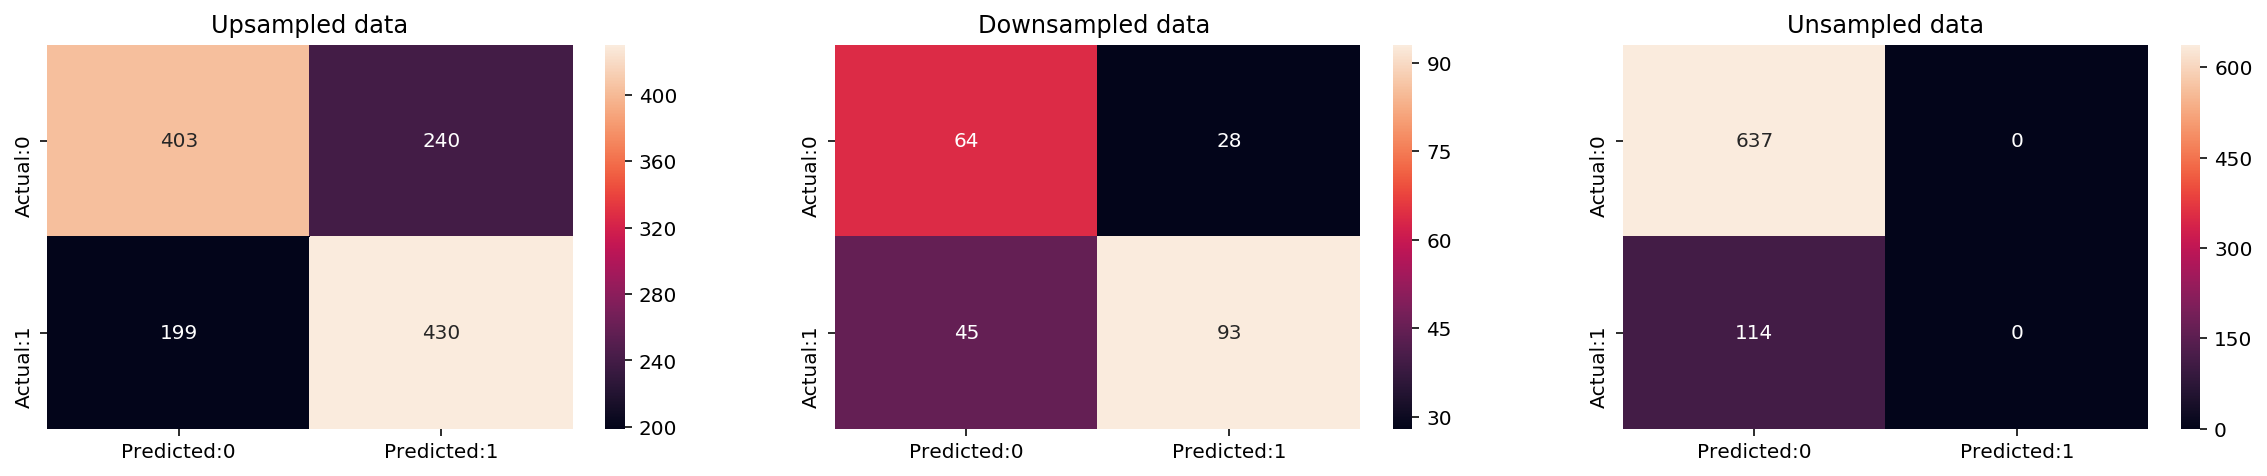

In [23]:
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sn.heatmap(conf_matrix_upsampled, annot=True, fmt='d')
plt.title('Upsampled data')

plt.subplot(3,3,2)
sn.heatmap(conf_matrix_downsampled, annot=True, fmt='d')
plt.title('Downsampled data ')

plt.subplot(3,3,3)
sn.heatmap(conf_matrix_unsampled, annot=True, fmt='d')
plt.title('Unsampled data')


# Ranging random state to see effect on metrics 